# French Wikipedia Newcomer Welcoming Experiment  Analysis
J. Nathan Matias, May 2020

The purpose of this document is to conduct initial data analysis of this survey, to inform future research.

Key documents:
* [Data Description](https://docs.google.com/document/d/1LK9uqW44dpkaOgU6-D99ulObq7i55beCq3f-8-d11F4/edit)
* [Experiment plan](https://osf.io/hq5vp/)


In [77]:
options("scipen"=9, "digits"=4)
library(dplyr)
library(MASS)
library(ggplot2)
library(rlang)
library(gmodels)
library(tidyverse)
library(viridis)
library(fabricatr)
library(estimatr)
library(DeclareDesign)
library(blockTools)
library(corrplot)
library(RColorBrewer)
## Installed DeclareDesign 0.13 using the following command:
# install.packages("DeclareDesign", dependencies = TRUE,
#                 repos = c("http://R.declaredesign.org", "https://cloud.r-project.org"))

## DOCUMENTATION AT: https://cran.r-project.org/web/packages/DeclareDesign/DeclareDesign.pdf
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
options(repr.plot.width=7, repr.plot.height=3.5)
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2   corrplot_0.84        blockTools_0.6-3    
 [4] DeclareDesign_0.12.0 randomizr_0.16.1     estimatr_0.14       
 [7] fabricatr_0.6.0      viridis_0.5.1        viridisLite_0.3.0   
[10] forcats_0.3.0        stringr_1.3.1        purrr_0.2.5         
[13] readr_1.2.1          t

In [79]:
data.folder = "~/Tresors/CivilServant/projects/wikipedia-integration/fr-newcomer-study/datasets/survey data/"
pilot.df <- read.csv(file.path(data.folder, "frwiki_pilot_survey_behavioural.csv"))
colnames(pilot.df)

pilot.df$manipulation.check = pilot.df$manipulation.check == 1 #YES is 1 NO is 2


pilot.df$seven.day.activated = pilot.df$seven.day.activated=="True"
pilot.df$survey.compliance = FALSE
pilot.df[pilot.df$survey.complier=="True",]$survey.compliance = TRUE
compliers.df <- subset(pilot.df, survey.compliance==TRUE)
compliers.df$role.clarity <- compliers.df$role.claritysocial.acceptance

[1] "survey.status"                 "survey.created.dt"            
 [3] "qualtrics.id"                  "Q1"                           
 [5] "gen.experience"                "efficacy"                     
 [7] "how.get.help"                  "role.claritysocial.acceptance"
 [9] "social.acceptance"             "community.warmth"             
[11] "community.supportive"          "community.competent"          
[13] "community.close"               "individual.close.one"         
[15] "individual.close.two"          "individual.close.three"       
[17] "manipulation.check"            "survey.complier"              
[19] "created.dt"                    "user.registered.approx.dt"    
[21] "private.anonymous.id"          "seven.day.activated"

# Survey Compliance

In [75]:
summary(pilot.df$survey.compliance)
print(paste("Total: ", nrow(pilot.df), sep=""))
print(paste("Compliance: ", 
            format(nrow(subset(pilot.df, survey.compliance==TRUE))/nrow(pilot.df)*100, nsmall=1),
            "%", sep=""))

   Mode   FALSE    TRUE 
logical    7835     107 

[1] "Total: 7942"
[1] "Compliance: 1.347%"


# Seven Day Activation Rate

In [16]:
summary(pilot.df$seven.day.activated)

   Mode   FALSE    TRUE 
logical    5016    2926 

# Activation Rate and Compliance

In [17]:
CrossTable(pilot.df$seven.day.activated,pilot.df$survey.compliance, prop.t = FALSE, prop.c = FALSE, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  7942 

 
                             | pilot.df$survey.compliance 
pilot.df$seven.day.activated |     FALSE |      TRUE | Row Total | 
-----------------------------|-----------|-----------|-----------|
                       FALSE |      4965 |        51 |      5016 | 
                             |     0.990 |     0.010 |     0.632 | 
-----------------------------|-----------|-----------|-----------|
                        TRUE |      2870 |        56 |      2926 | 
                             |     0.981 |     0.019 |     0.368 | 
-----------------------------|-----------|-----------|-----------|
                Column Total |      7835 |       107 |      7942 | 
-----------------------------|-----------|-----------|-----------|

 


In [18]:
summary(lm(survey.compliance ~ seven.day.activated, data=pilot.df))


Call:
lm(formula = survey.compliance ~ seven.day.activated, data = pilot.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0191 -0.0191 -0.0102 -0.0102  0.9898 

Coefficients:
                        Estimate Std. Error t value      Pr(>|t|)    
(Intercept)              0.01017    0.00163    6.25 0.00000000043 ***
seven.day.activatedTRUE  0.00897    0.00268    3.35       0.00082 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.115 on 7940 degrees of freedom
Multiple R-squared:  0.00141,	Adjusted R-squared:  0.00128 
F-statistic: 11.2 on 1 and 7940 DF,  p-value: 0.00082


### Manipulation Check (do you remember getting a welcome?)

In [19]:
summary(compliers.df$manipulation.check)
#summary(lm(seven.day.activated ~ manipulation.check, data=compliers.df))

   Mode   FALSE    TRUE 
logical      70      37 

# Summary Statistics on Outcome Variables

### Self-Efficacy:
How strongly do you agree or disagree with the following statements? [Likert scale 1 (\Strongly
disagree") to 5 (\Strongly agree")]
* I am able to make contributions that follow Wikipedia's expected practices.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.83    5.00    5.00 

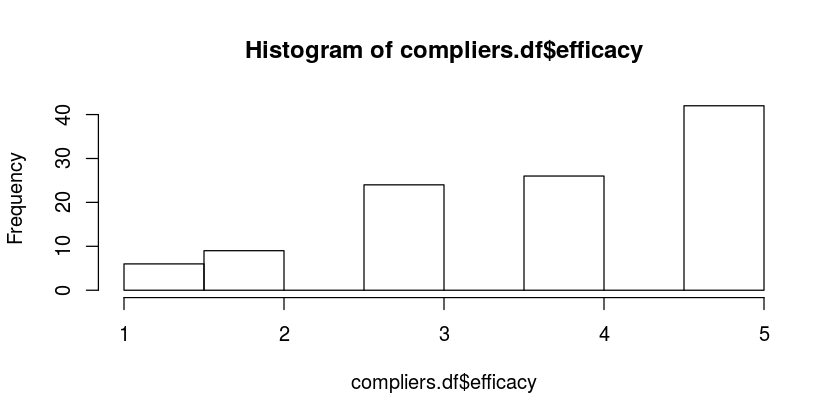

In [10]:
summary(compliers.df$efficacy)
hist(compliers.df$efficacy)

In [11]:
summary(factor(compliers.df$manipulation.check))
CrossTable(compliers.df$efficacy, compliers.df$manipulation.check, prop.chisq = FALSE, prop.t = FALSE, prop.c=FALSE)

summary(lm(efficacy ~ manipulation.check, data=compliers.df))

FALSE  TRUE 
   70    37


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  107 

 
                      | compliers.df$manipulation.check 
compliers.df$efficacy |     FALSE |      TRUE | Row Total | 
----------------------|-----------|-----------|-----------|
                    1 |         6 |         0 |         6 | 
                      |     1.000 |     0.000 |     0.056 | 
----------------------|-----------|-----------|-----------|
                    2 |         4 |         5 |         9 | 
                      |     0.444 |     0.556 |     0.084 | 
----------------------|-----------|-----------|-----------|
                    3 |        16 |         8 |        24 | 
                      |     0.667 |     0.333 |     0.224 | 
----------------------|-----------|-----------|-----------|
                    4 |        16 |        10 |        26 | 
                      |     0.615 |     0.


Call:
lm(formula = efficacy ~ manipulation.check, data = compliers.df)

Residuals:
   Min     1Q Median     3Q    Max 
  -2.8   -0.8    0.2    1.2    1.2 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.8000     0.1442   26.36   <2e-16 ***
manipulation.checkTRUE   0.0919     0.2452    0.37     0.71    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.21 on 105 degrees of freedom
Multiple R-squared:  0.00134,	Adjusted R-squared:  -0.00817 
F-statistic: 0.14 on 1 and 105 DF,  p-value: 0.709


### Reported Community Friendliness (NOT IN DATA)
Thinking about the French Wikipedia community, how much would you say the community
overall is:  [Likert scale 1 (\Not at all") to 5 (\Extremely")]
* Friendly

In [12]:
summary(compliers.df$friendliness)
hist(compliers.df$friendliness)

Length  Class   Mode 
     0   NULL   NULL 

ERROR: Error in hist.default(compliers.df$friendliness): 'x' must be numeric


### Reported Community Warmth (maybe substituted for friendliness?)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.54    5.00    5.00 


Call:
lm(formula = community.warmth ~ manipulation.check, data = compliers.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0541 -1.0541 -0.0541  0.9459  1.7286 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.271      0.137   23.90   <2e-16 ***
manipulation.checkTRUE    0.783      0.233    3.36   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.15 on 105 degrees of freedom
Multiple R-squared:  0.0972,	Adjusted R-squared:  0.0886 
F-statistic: 11.3 on 1 and 105 DF,  p-value: 0.00108


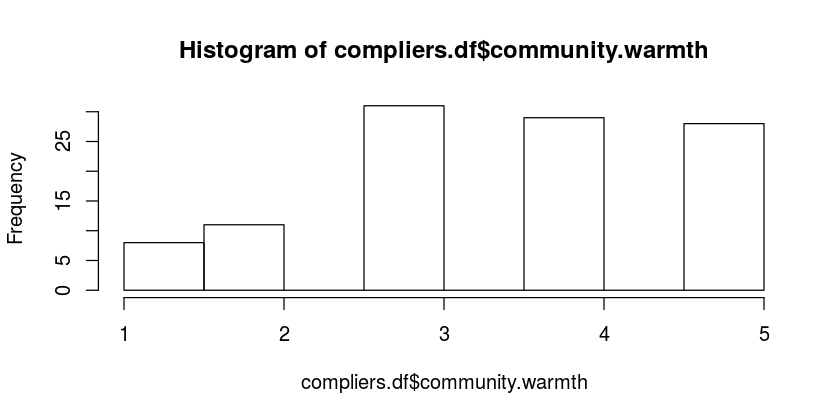

In [13]:
summary(compliers.df$community.warmth)
hist(compliers.df$community.warmth)

summary(lm(community.warmth ~ manipulation.check, data=compliers.df))

In [21]:
colnames(compliers.df)

[1] "survey.status"                 "survey.created.dt"            
 [3] "qualtrics.id"                  "Q1"                           
 [5] "gen.experience"                "efficacy"                     
 [7] "how.get.help"                  "role.claritysocial.acceptance"
 [9] "social.acceptance"             "community.warmth"             
[11] "community.supportive"          "community.competent"          
[13] "community.close"               "individual.close.one"         
[15] "individual.close.two"          "individual.close.three"       
[17] "manipulation.check"            "survey.complier"              
[19] "created.dt"                    "user.registered.approx.dt"    
[21] "private.anonymous.id"          "seven.day.activated"          
[23] "survey.compliance"

In [162]:
summary(lm(community.warmth ~ seven.day.activated + manipulation.check, data=compliers.df))


Call:
lm(formula = community.warmth ~ seven.day.activated + manipulation.check, 
    data = compliers.df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.877 -0.877  0.122  0.656  1.975 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.491      0.170   20.53  < 2e-16 ***
seven.day.activatedTRUE   -0.467      0.220   -2.12  0.03660 *  
manipulation.checkTRUE     0.853      0.231    3.68  0.00037 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.13 on 104 degrees of freedom
Multiple R-squared:  0.134,	Adjusted R-squared:  0.118 
F-statistic: 8.08 on 2 and 104 DF,  p-value: 0.000547


In [159]:
summary(lm(community.supportive ~ seven.day.activated + manipulation.check, data=compliers.df))


Call:
lm(formula = community.supportive ~ seven.day.activated + manipulation.check, 
    data = compliers.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6969 -0.6969  0.0009  0.7878  2.0009 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.514      0.172   20.47   <2e-16 ***
seven.day.activatedTRUE   -0.515      0.222   -2.32   0.0225 *  
manipulation.checkTRUE     0.698      0.234    2.99   0.0035 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.14 on 104 degrees of freedom
Multiple R-squared:  0.108,	Adjusted R-squared:  0.0907 
F-statistic: 6.29 on 2 and 104 DF,  p-value: 0.00264


In [173]:
cor.test(compliers.df$efficacy, compliers.df$community.warmth)


	Pearson's product-moment correlation

data:  compliers.df$efficacy and compliers.df$community.warmth
t = 3.4, df = 105, p-value = 0.001
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1305 0.4743
sample estimates:
   cor 
0.3126 


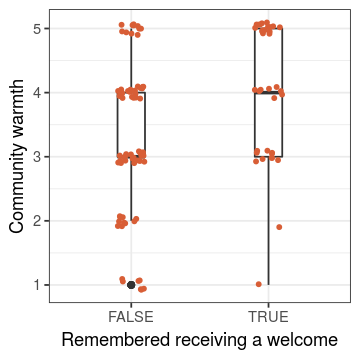

In [190]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(compliers.df, aes(manipulation.check, community.warmth)) +
        geom_boxplot(width=0.2) +
        geom_jitter(width=0.1, height=0.1, size=1, color="#D85E36") +
        ylab("Community warmth") +
        xlab("Remembered receiving a welcome") +
        theme_bw()

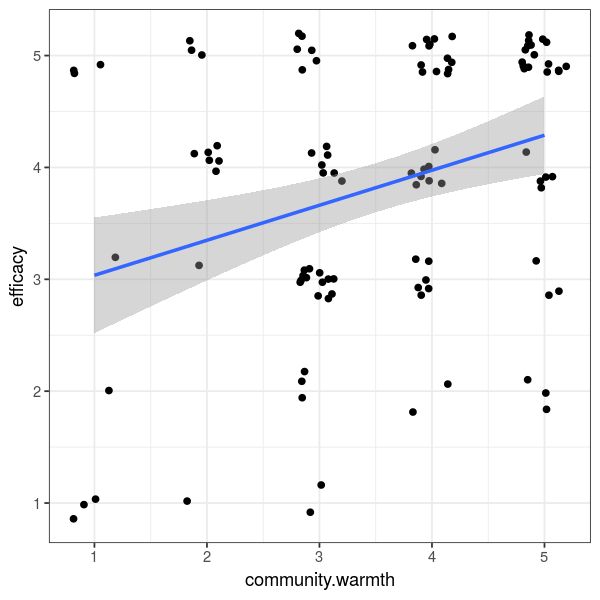

In [166]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(compliers.df, aes(community.warmth, efficacy)) +
        geom_jitter(width=0.2, height=0.2) +
        geom_smooth(method=lm) +
        theme_bw()

# Correlation Plot

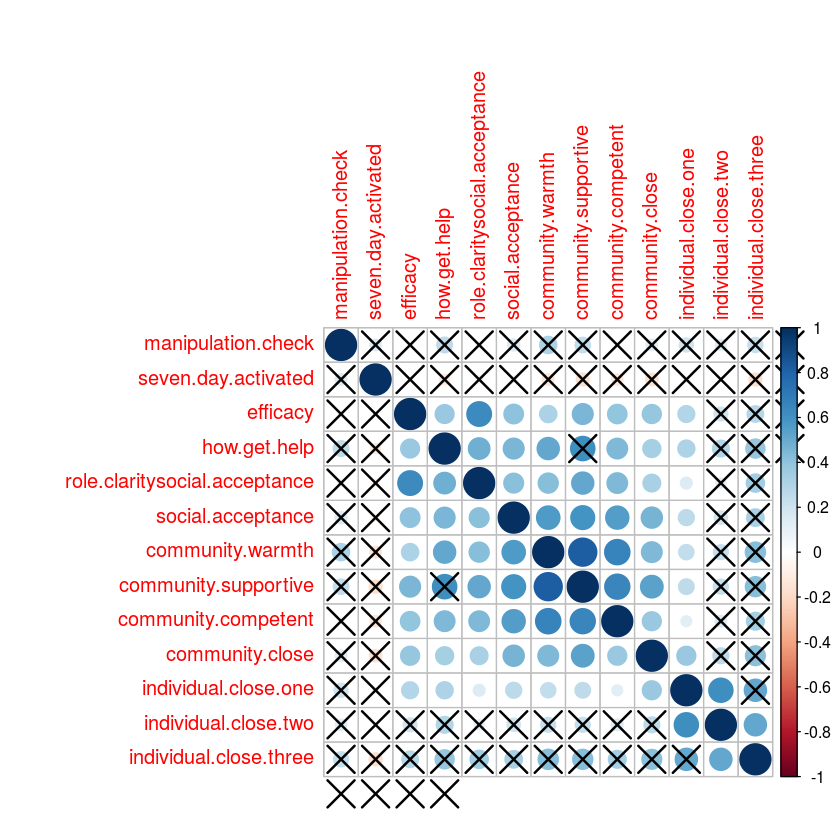

In [22]:
options(repr.plot.width=7, repr.plot.height=7)

cor.df <- cor.mtest(compliers.df[c('manipulation.check',
                                    'seven.day.activated',
                                    'gen.experience', 
                                    'efficacy',
                                    'how.get.help',
                                    'role.claritysocial.acceptance',
                                    'social.acceptance',
                                    'community.warmth',
                                    'community.supportive',
                                    'community.competent',
                                    'community.close',
                                    'individual.close.one',
                                    'individual.close.two',
                                    'individual.close.three')], conf.level=0.95, method="pearson")


corrplot(cor(compliers.df[c('manipulation.check',
                            'seven.day.activated',
                            'efficacy',
                            'how.get.help',
                            'role.claritysocial.acceptance',
                            'social.acceptance',
                            'community.warmth',
                            'community.supportive',
                            'community.competent',
                            'community.close',
                            'individual.close.one',
                            'individual.close.two',
                            'individual.close.three')],
            method="pearson"), 
         sig.level = 0.001, p.mat = cor.df$p)